In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D, LeakyReLU
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

In [5]:
test = pd.read_csv("./input/Kannada-MNIST/test.csv")
train = pd.read_csv("./input/Kannada-MNIST/train.csv")

x = train.iloc[:,1:].values
y = train.iloc[:,0].values

x = x.reshape(x.shape[0], 28, 28, 1)
y = to_categorical(y, 10)

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.10, random_state=6666) 

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)

valid_datagen = ImageDataGenerator(rescale=1./255.)

In [4]:
batch_size = 1024
num_classes = 10
epochs = 50
learning_rate = 0.001

def new_model():

    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(32, kernel_size=5, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(64, kernel_size=5, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(128, kernel_size=5, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    return model

model = new_model()
model.summary(120)

optimizer = Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


Model: "sequential_1"
________________________________________________________________________________________________________________________
Layer (type)                                          Output Shape                                    Param #           
conv2d_1 (Conv2D)                                     (None, 28, 28, 32)                              320               
________________________________________________________________________________________________________________________
batch_normalization_1 (BatchNormalization)            (None, 28, 28, 32)                              128               
________________________________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)                             (None, 28, 28, 32)                              0                 
________________________________________________________________________________________________________________________
conv2d_2 

In [5]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=valid_datagen.flow(x_valid, y_valid),
                              callbacks=[learning_rate_reduction, es])


Epoch 1/50
53/53 [==============================] - 11s 202ms/step - loss: 0.8864 - accuracy: 0.6987 - val_loss: 2.3501 - val_accuracy: 0.3492
Epoch 2/50
53/53 [==============================] - 8s 153ms/step - loss: 0.1581 - accuracy: 0.9491 - val_loss: 15.7796 - val_accuracy: 0.0955
Epoch 3/50
53/53 [==============================] - 8s 157ms/step - loss: 0.1054 - accuracy: 0.9649 - val_loss: 21.0109 - val_accuracy: 0.0955
Epoch 4/50
53/53 [==============================] - 8s 158ms/step - loss: 0.0829 - accuracy: 0.9729 - val_loss: 15.8112 - val_accuracy: 0.0955
Epoch 5/50
53/53 [==============================] - 8s 157ms/step - loss: 0.0721 - accuracy: 0.9768 - val_loss: 35.5585 - val_accuracy: 0.0955
Epoch 6/50
53/53 [==============================] - 8s 158ms/step - loss: 0.0622 - accuracy: 0.9794 - val_loss: 34.1909 - val_accuracy: 0.0955
Epoch 7/50
53/53 [==============================] - 9s 161ms/step - loss: 0.0643 - accuracy: 0.9794 - val_loss: 20.5475 - val_accuracy: 0.095

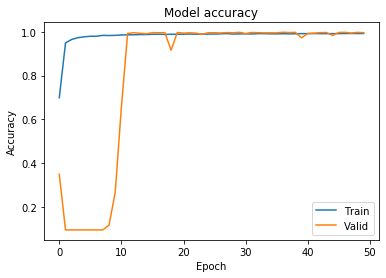

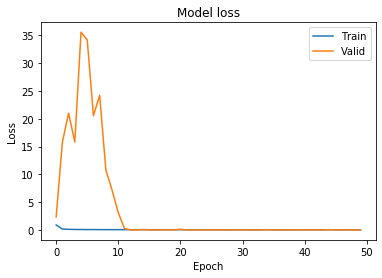

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'])
plt.savefig('acc_cnn.pdf')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'])
plt.savefig('loss_cnn.pdf')
plt.show()